#Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

The linear regression model provides a sloped straight line representing the relationship between the variables. Consider the below image:



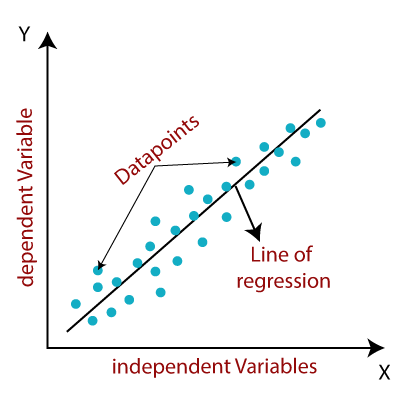

#Types of Linear Regression
Linear regression can be further divided into two types of the algorithm:

#Simple Linear Regression:
If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.

#Multiple Linear regression:
If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.

#Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

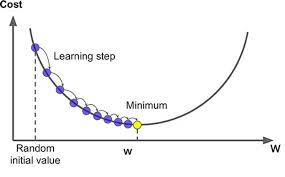

#Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

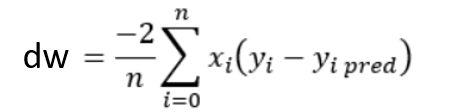

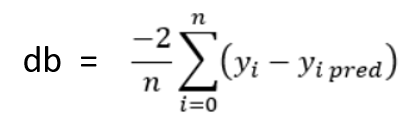

#linear regression workflow

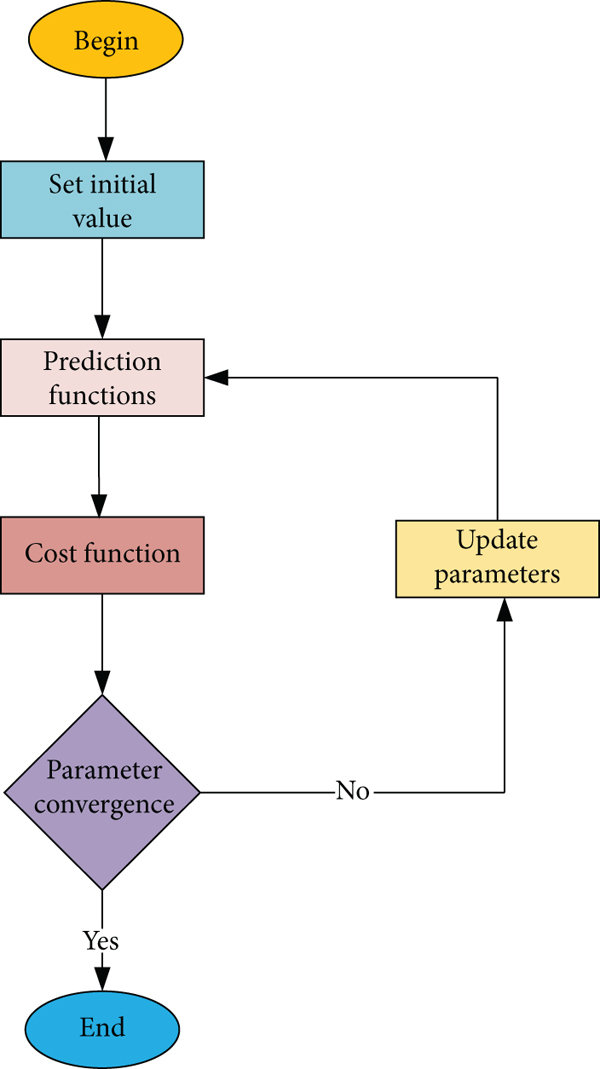



In [323]:
# import the depencies
import numpy as np

#linear regression

scratch core:

In [324]:
class LinearRegression:

  def __init__( self, learning_rate, no_of_iterations ) :
          
        self.learning_rate = learning_rate
          
        self.no_of_iterations = no_of_iterations

    # fit function to train the model

  def fit( self, x, y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = x.shape
          
        # initiating the weight and bias
          
        self.w = np.zeros(self.n)
          
        self.b = 0
          
        self.x = x
          
        self.y = y


        # implementing Gradient Descent for Optimization
                  
        for i in range( self.no_of_iterations ) :
              
            self.update_weights()
              
        
      
    # function to update weights in gradient descent
      
  def update_weights( self ) :
             
        y_prediction = self.predict( self.x)
          
        # calculate gradients  
      
        dw = - ( 2 * ( self.x.T ).dot( self.y - y_prediction )  ) / self.m
       
        db = - 2 * np.sum( self.y - y_prediction ) / self.m 
          
        # updating the weights
      
        self.w = self.w - self.learning_rate * dw
      
        self.b = self.b - self.learning_rate * db
          
      
    # Line function for prediction:
      
  def predict( self, x ) :
      
        return x.dot( self.w ) + self.b




#Assumptions of Linear Regression
Below are some important assumptions of Linear Regression. These are some formal checks while building a Linear Regression model, which ensures to get the best possible result from the given dataset.

Linear relationship between the features and target:

Linear regression assumes the linear relationship between the dependent and independent variables.

Small or no multicollinearity between the features:

Multicollinearity means high-correlation between the independent variables. Due to multicollinearity, it may difficult to find the true relationship between the predictors and target variables. Or we can say, it is difficult to determine which predictor variable is affecting the target variable and which is not. So, the model assumes either little or no multicollinearity between the features or independent variables.

Homoscedasticity Assumption:

Homoscedasticity is a situation when the error term is the same for all the values of independent variables. With homoscedasticity, there should be no clear pattern distribution of data in the scatter plot.

Normal distribution of error terms:

Linear regression assumes that the error term should follow the normal distribution pattern. If error terms are not normally distributed, then confidence intervals will become either too wide or too narrow, which may cause difficulties in finding coefficients.
It can be checked using the q-q plot. If the plot shows a straight line without any deviation, which means the error is normally distributed.

No autocorrelation:

The linear regression model assumes no autocorrelation in error terms. If there will be any correlation in the error term, then it will drastically reduce the accuracy of the model. Autocorrelation usually occurs if there is a dependency between residual errors.

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
df=pd.read_csv("/content/BTC-USD.csv")

In [327]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [328]:
df.shape

(2713, 7)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [330]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [331]:
df.duplicated().sum()

0

In [332]:
df.drop('Adj Close',axis=1,inplace=True)

In [333]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [334]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [335]:
df.skew()

<ipython-input-335-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Open      1.856422
High      1.846755
Low       1.865644
Close     1.852802
Volume    3.080429
dtype: float64

In [336]:
df['Open']=np.log(df['Open'])
df['Open'].skew()

-0.14727085927025937

In [337]:
df['High']=np.log(df['High'])
df['High'].skew()

-0.1474248812379575

In [338]:
df['Low']=np.log(df['Low'])
df['Low'].skew()

-0.1487563837056031

In [339]:
df['Close']=np.log(df['Close'])
df['Close'].skew()

-0.14854493985449393

In [340]:
df['Volume']=np.log(df['Volume'])
df['Volume'].skew()

-0.4353987414294511

In [341]:
df.skew()

<ipython-input-341-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Open     -0.147271
High     -0.147425
Low      -0.148756
Close    -0.148545
Volume   -0.435399
dtype: float64

In [342]:
corr=df.corr()

In [343]:
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999876,0.999815,0.999748,0.955228
High,0.999876,1.000000,0.999746,0.999870,0.955813
Low,0.999815,0.999746,1.000000,0.999874,0.954727
Close,0.999748,0.999870,0.999874,1.000000,0.955298
Volume,0.955228,0.955813,0.954727,0.955298,1.000000


#data visualization

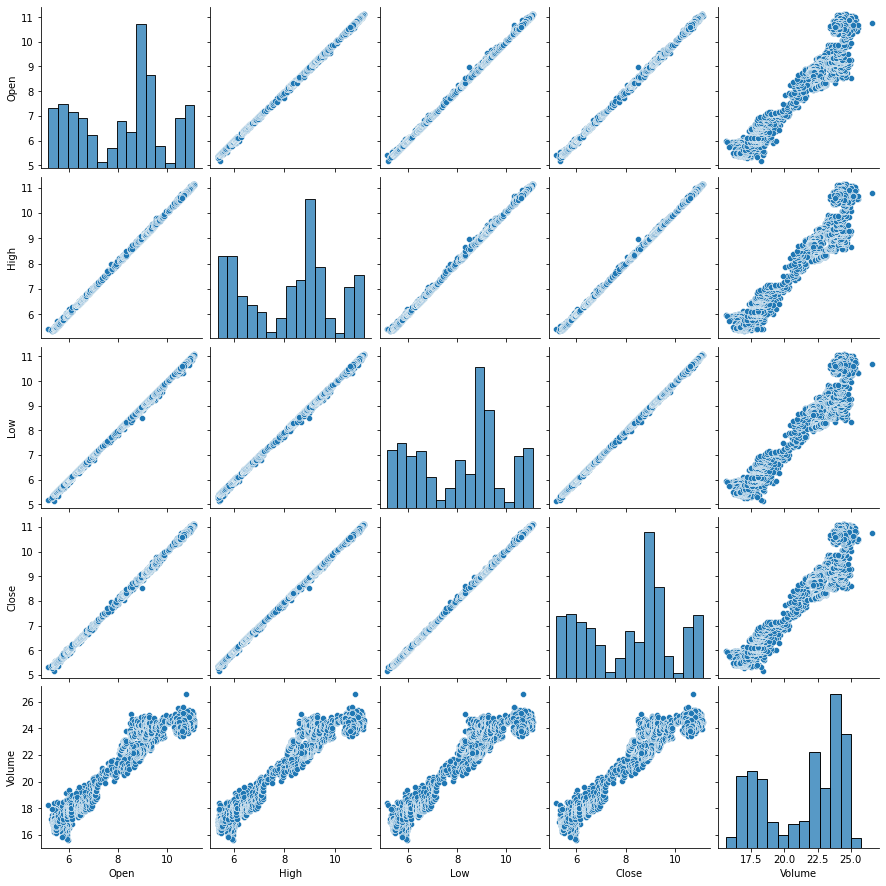

In [344]:
sns.pairplot(df)

#univarant analysis

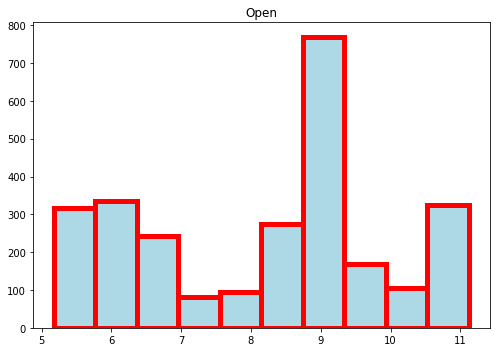

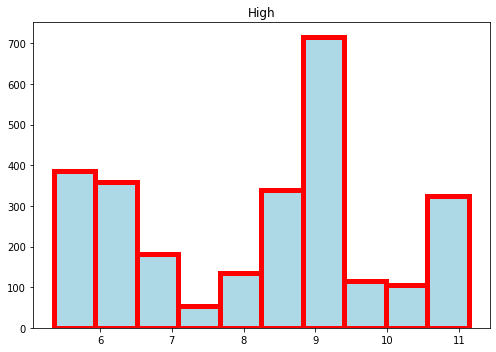

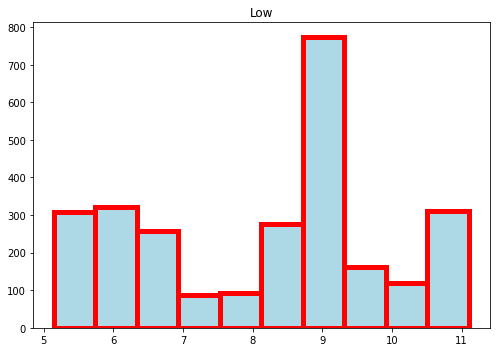

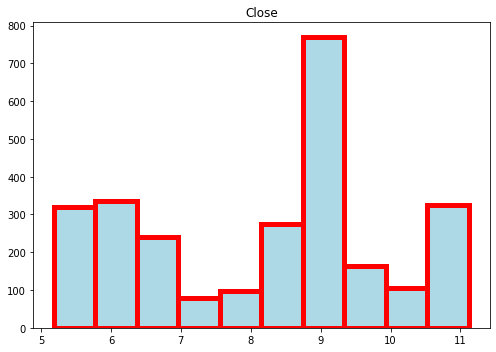

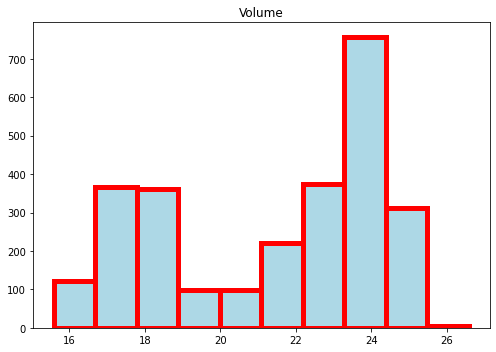

In [387]:
columns=["Open","High","Low","Close","Volume"]
for x in columns:
  plt.figure(figsize=(7,5))
  plt.hist(df[x],color = "lightblue", ec="red", lw=5)
  plt.title(x)
  plt.show()


#bivarant analysis

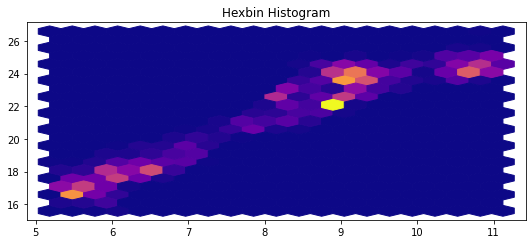

In [378]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = 2 * np.random.randn(5000)
y = x + np.random.randn(5000)

fig, ax = plt.subplots()
_ = ax.hexbin(x=df['Close'], y=df['Volume'], gridsize=20, cmap='plasma')

ax.set_title('Hexbin Histogram')

plt.show()

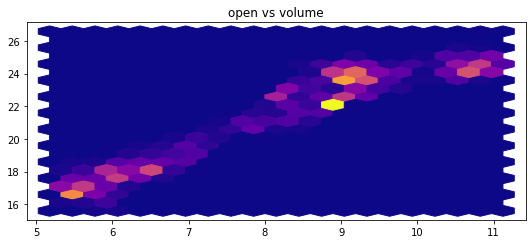

In [381]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = 2 * np.random.randn(5000)
y = x + np.random.randn(5000)

fig, ax = plt.subplots()
_ = ax.hexbin(x=df['Open'], y=df['Volume'], gridsize=20, cmap='plasma')

ax.set_title('open vs volume')

plt.show()

<Figure size 864x432 with 0 Axes>

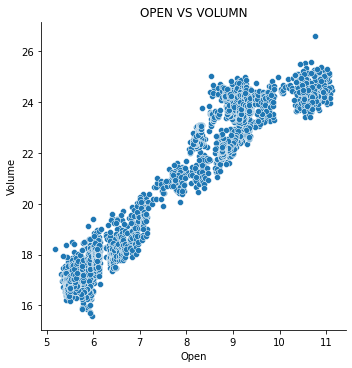

In [346]:
plt.figure(figsize=(12,6))
sns.relplot(x=df['Open'],y=df['Volume'])
plt.title("OPEN VS VOLUMN")
plt.show()

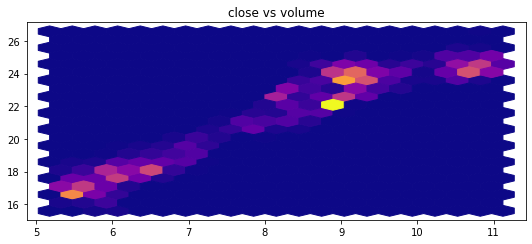

In [382]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = 2 * np.random.randn(5000)
y = x + np.random.randn(5000)

fig, ax = plt.subplots()
_ = ax.hexbin(x=df['Open'], y=df['Volume'], gridsize=20, cmap='plasma')

ax.set_title('close vs volume')

plt.show()

<Figure size 864x432 with 0 Axes>

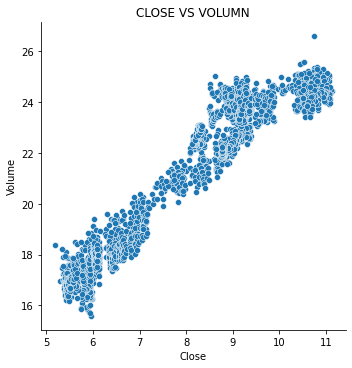

In [347]:
plt.figure(figsize=(12,6))
sns.relplot(x=df['Close'],y=df['Volume'])
plt.title("CLOSE VS VOLUMN")
plt.show()

In [348]:
df[['year','month','date']]=df['Date'].str.split('-',expand=True)

In [349]:
df.drop("Date",axis=1,inplace=True)

In [350]:
df.head()

,Open,High,Low,Close,Volume,year,month,date
0,6.143894,6.148840,6.114615,6.125414,16.862734,2014,09,17
1,6.124377,6.124377,6.023699,6.050771,17.355983,2014,09,18
2,6.049976,6.058738,5.952027,5.978369,17.450981,2014,09,19
3,5.978058,6.048072,5.965847,6.013480,17.422735,2014,09,20
4,6.011475,6.022057,5.974270,5.988513,17.095673,2014,09,21


In [351]:
x=df.drop(columns=["Volume","High","Low"],axis=1)

In [352]:
# standarzies all value in datset in one range of values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [353]:
x

array([[-1.1642812 , -1.17566622, -1.81021716,  0.68285996,  0.1434897 ],
       [-1.17549492, -1.21854924, -1.81021716,  0.68285996,  0.25715029],
       [-1.21824305, -1.26014431, -1.81021716,  0.68285996,  0.37081089],
       ...,
       [ 1.44805603,  1.40075063,  1.88652289, -1.30247278,  0.1434897 ],
       [ 1.401993  ,  1.3935196 ,  1.88652289, -1.30247278,  0.25715029],
       [ 1.39443414,  1.39488787,  1.88652289, -1.30247278,  0.37081089]])

In [354]:
y=df[['Volume','High','Low']]

In [355]:
# standarzies all value in datset in one range of values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=scaler.fit_transform(y)

In [356]:
y

array([[-1.56537382, -1.17233865, -1.17091003],
       [-1.3939784 , -1.18636649, -1.22330645],
       [-1.36096805, -1.224006  , -1.26461244],
       ...,
       [ 0.91150777,  1.43453878,  1.41573558],
       [ 0.87027683,  1.39132254,  1.40690884],
       [ 0.85432173,  1.381671  ,  1.41231037]])

#spliting the dataset int train and test dataset

In [357]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

#linear model

In [358]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [359]:
model.fit(x_train,y_train)

LinearRegression()

In [360]:
y_pred=model.predict(x_test)

In [361]:
y_pred

array([[ 1.49466682,  1.58185631,  1.57104082],
       [ 1.33847408,  1.32700577,  1.33008354],
       [-1.43861572, -1.5342747 , -1.53857947],
       ...,
       [ 0.53574292,  0.55496966,  0.55736348],
       [-1.09349804, -1.24619088, -1.24534661],
       [-1.44218881, -1.53953144, -1.54276567]])

#evalution - linear regression

In [362]:
from sklearn.metrics import mean_absolute_error
print("mean_absolute_error",mean_absolute_error(y_pred,y_test),'\n')

mean_absolute_error 0.07528734793674077 



In [363]:
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y_pred,y_test),'\n')

r2_score: 0.9764581836917289 



In [366]:
print('coefficient',model.coef_,'\n')


coefficient [[ 3.49466086e-01  2.71651291e-01  3.59620067e-01  3.48348507e-03
   1.63322703e-03]
 [ 5.32041722e-01  4.76842124e-01 -9.48016998e-03 -1.88742118e-03
  -1.13148773e-04]
 [ 3.67454844e-01  6.20001237e-01  1.33370095e-02  3.11043850e-03
   2.67187707e-04]] 



In [367]:
print('intercepts',model.intercept_)

intercepts [ 0.00377264  0.00012634 -0.00021783]


#checking the model with the user inpur

In [372]:
input=[614,611,2014,9,17]
input=np.reshape(input,(1,5))
prediction=model.predict(input)

In [373]:
print('High',abs(prediction[0,1]))

High 598.9123088777415


In [374]:
print('Low',abs(prediction[0,2]))

Low 631.3310859247047


In [375]:
print('Volume',abs(prediction[0,0]).astype('int64'))

Volume 1104
